# 1. Sympy를 활용한 미분

- sympy의 symbolic 연산 기능 활용

In [10]:
# 상수항이 존재할 경우, 편미분처럼 모든 변수, 상수를 sympbol로 처리 후, 편미분처럼 실시함

import sympy
x,k,a,b = sympy.symbols('x k a b')

In [3]:
f = x**3 - 1 
f

x**3 - 1

In [4]:
sympy.diff(f,x)

3*x**2

In [8]:
f = sympy.log(x**2 - 3*k)
sympy.diff(f,x)

2*x/(-3*k + x**2)

In [9]:
f = sympy.exp(a*(x**b))
sympy.diff(f,x)

a*b*x**b*exp(a*x**b)/x

# 2. Sympy를 활용한 부정적분

- sympy의 symbolic 연산 기능 활용

In [12]:
import sympy

x = sympy.symbols('x')
f = x*sympy.exp(x) + sympy.exp(x)
f

x*exp(x) + exp(x)

In [13]:
sympy.integrate(f)

x*exp(x)

In [19]:
x, y = sympy.symbols('x y')
f = 2*x + y
f

2*x + y

In [20]:
sympy.integrate(f,x)

x**2 + x*y

In [21]:
sympy.integrate(f,y)

2*x*y + y**2/2

# 2. Sympy를 활용한 정적분

- 방법 1 : 미적분 기본정리 공식 활용 (subs(), evalf() 활용)
- 방법 2 : 수치적분을 통한 면적 계산 (sp.integrate.quad(f,0,2) 활용) -> scipy 패키지

### 방법 1 : 미적분학 기본정리

In [25]:
x, y = sympy.symbols('x y')
f = x**3 -3*x**2 + x + 6
f

x**3 - 3*x**2 + x + 6

In [24]:
F = sympy.integrate(f)
F

x**4/4 - x**3 + x**2/2 + 6*x

In [29]:
(F.subs(x,2) - F.subs(x,0)).evalf()

10.0000000000000

### 방법 2 : 수치적분으로 면적 계산 (scipy 패키지)

In [31]:
# Return 값의 두번째 숫자는 오차의 상한값
def f(x):
    return x**3 - 3*x**2 + x + 6

sp.integrate.quad(f,0,2)

(10.0, 1.1102230246251565e-13)

### 다변수 정적분

다음 함수는 $x=2$에서 $x=8$까지, 그리고 $y=0$에서 $y=6$까지의 정사각형 영역에서 정적분으로 함수의 부피를 구하는 모습을 시각화한 것

$$
\begin{align}
\int_{y=0}^{y=6}\int_{x=2}^{x=8} x^2 - 10 x + y + 50 \;\; dx dy
\end{align}
$$

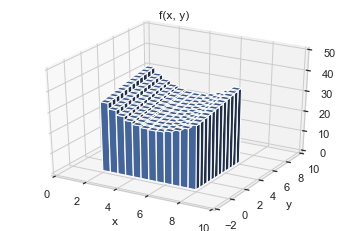

<Figure size 720x720 with 0 Axes>

In [39]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
_x = np.arange(12) / 2 + 2
_y = np.arange(12) / 2
X, Y = np.meshgrid(_x, _y)
x, y = X.ravel(), Y.ravel()
z = x * x - 10 * x + y + 50
z0 = np.zeros_like(z)
ax.bar3d(x, y, z0, 0.48, 0.48, z)
ax.set_xlim(0, 10)
ax.set_ylim(-2, 10)
ax.set_zlim(0, 50)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.title("f(x, y)")
plt.show()

### 방법 2 : 수치적분으로 면적 계산 (scipy 패키지)


```
- dblquad(f, x하한, x상한, y하한, y상한)
```

$$
\begin{align}
\int_0^{\infty} \int_1^{\infty} \dfrac{\exp(-xy)}{x^2} dx dy
\end{align}
$$

In [46]:
def f(y,x):
    return np.exp(-x*y) / x**2

sp.integrate.dblquad(f,1,np.inf,lambda x: 0,lambda x: np.inf)

(0.4999999999999961, 1.0684538743333441e-08)